In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-darkgrid')

C:\Users\Victo\AppData\Local\Temp\ipykernel_15660\3818186681.py:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


In [3]:
df = pd.read_csv('data_cleaned.csv')

In [4]:
# Import the function
from sklearn.model_selection import train_test_split

# Split of feaures and outcomes
X = df.drop(['outcome_profit'],1)
y = df['outcome_profit']

# Perform train/test-split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

C:\Users\Victo\AppData\Local\Temp\ipykernel_15660\758577343.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = df.drop(['outcome_profit'],1)


In [5]:
from sklearn.preprocessing import StandardScaler

num_feat = X_train.select_dtypes(include=['int64', 'float64']).columns

scaler = StandardScaler()
scaler.fit(X_train[num_feat])

X_train_stan = X_train.copy()

X_train_stan[num_feat] = scaler.transform(X_train[num_feat])

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4947 entries, 0 to 4946
Data columns (total 100 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   income_am               4947 non-null   float64
 1   profit_last_am          4947 non-null   float64
 2   profit_am               4947 non-null   float64
 3   damage_am               4947 non-null   float64
 4   crd_lim_rec             4947 non-null   float64
 5   cab_requests            4947 non-null   float64
 6   bar_no                  4947 non-null   float64
 7   neighbor_income         4947 non-null   float64
 8   age                     4947 non-null   float64
 9   tenure_mts              4947 non-null   float64
 10  tenure_yrs              4947 non-null   float64
 11  claims_am               4947 non-null   float64
 12  nights_booked           4947 non-null   float64
 13  shop_am                 4947 non-null   float64
 14  outcome_profit          4947 non-null  

# Linear Regression

In [6]:
from sklearn.linear_model import LinearRegression
reg= LinearRegression()
reg.fit(X_train_stan, y_train)

LinearRegression()

In [7]:
predictions_train = reg.predict(X_train_stan)

coefficient of determination

In [8]:
from sklearn.metrics import r2_score
print(r2_score(y_train, predictions_train))

0.7609736405752742


MAE

In [9]:
from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(y_train, predictions_train))

1556.931499991138


MSE

In [10]:
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_train, predictions_train))

18047231.33533516


# Polynomial Regression

In [11]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score

avg_scores = [None] * 5

for i in np.arange(1,6):
    
    reg_poly = Pipeline([('poly', PolynomialFeatures(degree=i)),
                  ('linear', LinearRegression(fit_intercept=False))])
    
    scores = cross_val_score(reg_poly, X_train_stan, y_train, scoring = 'r2', cv=3)
    
    avg_scores[i-1] = scores.mean()
    
    print("Order "+str(i)+": avg R^2 = "+str( avg_scores[i-1]))

Order 1: avg R^2 = -8.34956103560475e+24
Order 2: avg R^2 = -25.926666393856987


In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))
plt.scatter(np.arange(1,6), avg_scores, c='b', label='data')
plt.axis('tight')
plt.title("Cross-validation polynomials")
ax.set_xlabel("Order");
ax.set_ylabel("CV R^2");
plt.tight_layout()
plt.show()

# KNN

## Radius Neighbors Regression

In [7]:
from sklearn.neighbors import RadiusNeighborsRegressor
from sklearn.model_selection import cross_val_score

Radius = np.linspace(7,17,10)    
cv_scores = []
sd_scores = []
# perform 5-fold cross validation on the 11 possible values for the radius (bandwith)
for k in Radius:
    Rnn = RadiusNeighborsRegressor(radius= k)
    scores = cross_val_score(Rnn, X_train_stan, y_train,  cv=5)
    cv_scores.append(scores.mean())
    sd_scores.append(np.sqrt(scores.var())/np.sqrt(5))

c:\Users\Victo\.virtualenvs\SchoolProject-jfK-57_F\Lib\site-packages\sklearn\neighbors\_regression.py:494: UserWarning: One or more samples have no neighbors within specified radius; predicting NaN.
  warnings.warn(empty_warning_msg)
c:\Users\Victo\.virtualenvs\SchoolProject-jfK-57_F\Lib\site-packages\sklearn\model_selection\_validation.py:794: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\Victo\.virtualenvs\SchoolProject-jfK-57_F\Lib\site-packages\sklearn\metrics\_scorer.py", line 117, in __call__
    score = scorer(estimator, *args, **kwargs)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Victo\.virtualenvs\SchoolProject-jfK-57_F\Lib\site-packages\sklearn\metrics\_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Victo\.virtualenvs\SchoolProject-

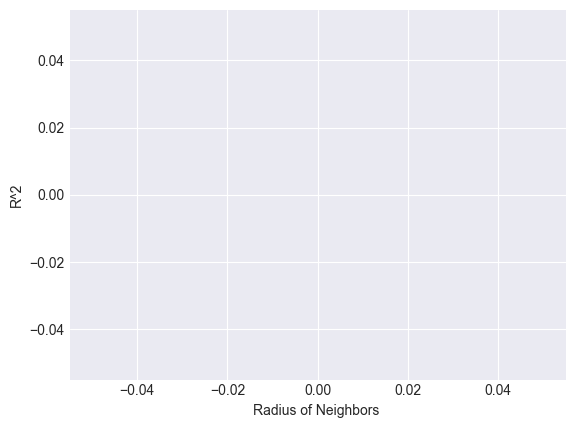

In [8]:
max_value = max(cv_scores)
max_index = cv_scores.index(max_value)

plt.plot(Radius, cv_scores)
plt.xlabel('Radius of Neighbors ')
plt.ylabel('R^2')

plt.show()

## K-nearest Neighbors

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score

K = np.arange(1,65)    
cv_scores = []
sd_scores = []
# perform 5-fold cross validation on the  possible values for the radius (bandwith)
for k in K:
    knn = KNeighborsRegressor(n_neighbors= k)
    scores = cross_val_score(knn, X_train_stan, y_train,  cv=5)
    cv_scores.append(scores.mean())
    sd_scores.append(np.sqrt(scores.var())/np.sqrt(5))

In [ ]:
max_value = max(cv_scores)
max_index = cv_scores.index(max_value)

plt.plot(K, cv_scores)
plt.xlabel('k Neighbors ')
plt.ylabel('R^2')

plt.show()
print('The best k is', K[max_index])

In [ ]:
knn = KNeighborsRegressor(n_neighbors= 10)
knn.fit(X_train_stan, y_train)
knn.score(X_train_stan, y_train)

## Penalisation

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=3)
X_train_poly = poly.fit_transform(X_train_stan)
X_test_poly = poly.transform(X_test_stan)
X_train_poly.shape

lasso penalisation

In [ ]:
from sklearn import linear_model
linreg_lasso1 = linear_model.Lasso()
linreg_lasso1.fit(X_train_poly, y_train)
print('R2: %.3f' % linreg_lasso1.score(X_train_poly, y_train))

In [ ]:
# look at the coefficients (use .coef_)
linreg_lasso1.coef_

cross-validation

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn import linear_model

Alpha = np.logspace(-3,0,10)  
cv_scores = []
sd_scores = []
# perform 5-fold cross validation on the  possible values for the radius (bandwith)
for a in Alpha:
    lasso = linear_model.Lasso(a, max_iter=5000)
    scores = cross_val_score(lasso, X_train_poly, y_train,  cv=5)
    cv_scores.append(scores.mean())
    sd_scores.append(np.sqrt(scores.var())/np.sqrt(5))
 
max_value = max(cv_scores)
max_index = cv_scores.index(max_value)

train = linear_model.Lasso(Alpha[max_index], max_iter=5000)
train.fit(X_train_poly,y_train)

In [ ]:
plt.plot(Alpha, cv_scores)
plt.xlabel('alpha')
plt.ylabel('R^2')

print('The optimal alpha is', Alpha[max_index])
print('The training score of the optimal alpha is', train.score(X_train_poly,y_train))
print('The validation score of the optimal alpha is', max_value)

plt.show()

# Tree based

## Decision trees

cross validation

In [ ]:
from sklearn.tree import DecisionTreeRegressor  
from sklearn.model_selection import cross_val_score

depth = np.arange(1,50)    # This will give an array of numbers between 1 and 10
cv_scores = []
sd_scores = []
# perform 5-fold cross validation on the  possible values for the radius (bandwith)
for d in depth:
    dec_tree = DecisionTreeRegressor(random_state = 0, max_depth=d)  
    scores = cross_val_score(dec_tree, X_train_stand, y_train,  cv=5)
    cv_scores.append(scores.mean())
    sd_scores.append(np.sqrt(scores.var())/np.sqrt(5))

In [ ]:
max_value = max(cv_scores)
max_index = cv_scores.index(max_value)

plt.plot(depth, cv_scores)
plt.xlabel('depth')
plt.ylabel('R^2')

plt.show()
print('The best depth is', depth[max_index])
print('The best validation scoer is', max_value)

In [ ]:
from sklearn import tree  
dec_tree = DecisionTreeRegressor(random_state = 0, max_depth=4)  
dec_tree.fit(X_train_stand, y_train) 
print(dec_tree.score(X_train_stand, y_train) )

## Random Forest

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor

criterion =['squared_error','absolute_error']
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 500, num = 200)]
max_features = ['auto', 'sqrt', 'log2']
max_depth = [int(x) for x in np.linspace(1, 15, num = 15)]
min_samples_split = [int(x) for x in np.linspace(2, 15, num = 14)]
min_samples_leaf = [int(x) for x in np.linspace(1, 15, num = 15)]
max_leaf_nodes = [int(x) for x in np.linspace(10, 500, num = 490)]

# create the random grid to search for best hyperparameters
random_grid = {'criterion': criterion,
               'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'max_leaf_nodes': max_leaf_nodes}

# then do cross-validatoin
rf = RandomForestRegressor()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, 
                               cv = 3, verbose=2, random_state=42, n_jobs=-1)
# n_jobs=-1 to run as many models  parallel as possible
rf_random.fit(X_train_stand, y_train)

In [ ]:
print(rf_random.score(X_train_stand, y_train))
print(rf_random.best_score_)

In [ ]:
rf_random.best_params_

In [ ]:
out = pd.DataFrame(rf_random.cv_results_)

xlabel_names = ['param_max_depth','param_min_samples_split','param_min_samples_leaf','param_n_estimators',
                'param_max_features', 'param_max_leaf_nodes', 'param_criterion']

fig, axs = plt.subplots(3,3, figsize=(20,10))

axs[0,0].scatter(out['param_max_depth'], out['mean_test_score'], c='blue');
axs[0,0].set_title('max_depth')

axs[0,1].scatter(out['param_min_samples_split'], out['mean_test_score'], c='blue');
axs[0,1].set_title('min_samples_split')

axs[0,2].scatter(out['param_min_samples_leaf'], out['mean_test_score'], c='blue');
axs[0,2].set_title('min_samples_leaf')

axs[1,0].scatter(out['param_n_estimators'], out['mean_test_score'], c='blue');
axs[1,0].set_title('n_estimators')

axs[1,1].scatter(out['param_max_features'], out['mean_test_score'], c='blue');
axs[1,1].set_title('max_features')

axs[1,2].scatter(out['param_max_leaf_nodes'], out['mean_test_score'], c='blue');
axs[1,2].set_title('max_leaf_nodes')

axs[2,0].scatter(out['param_criterion'], out['mean_test_score'], c='blue');
axs[2,0].set_title('criterion')

for ax in axs.flat:
    ax.set(ylabel='r_squared')